In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
dataset = pd.read_csv("Mall_Customers.csv")
#only consider income and spending score
X = dataset.iloc[:, [3,4]].values

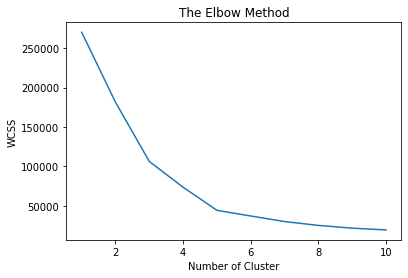

In [11]:
#use elbow method to find optimal number of clusters
from sklearn.cluster import KMeans
#calculate: within cluster sum of squares (wcss)
wcss = []
#loop through different numbers of clusters: from 1 to 10
for i in range(1, 11):
    #use k-means++ to prevent random initialization trap
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    #the attribute 'inertia' (from the object kmeans) gives us the wcss value
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [12]:
#training the model
#fit_predict returns the clusters (dependent variable), that 
#separates customers in different groups
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

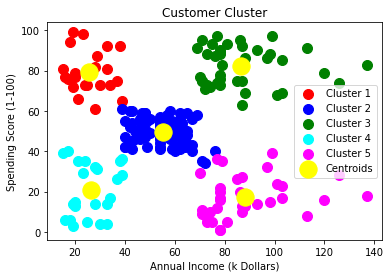

In [13]:
#k_means == 0: we only select customers where the index is 0
#the 0 after the comma means: we select the annual income
#the 1 after the comma means: we select the spending score
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
#show the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Customer Cluster')
plt.xlabel('Annual Income (k Dollars)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc = 'best')
plt.show()

In [14]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
#do one-hote encoding on gender column
X = pd.get_dummies(dataset)

In [19]:
X.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [20]:
#consider all features
X_all = X.iloc[:, [1,4]].values

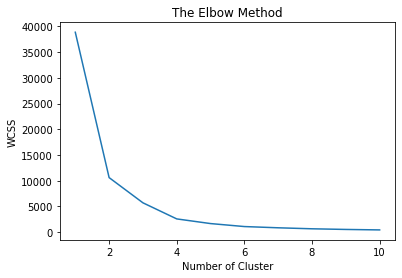

In [21]:
#use elbow method to find optimal number of clusters
from sklearn.cluster import KMeans
#calculate: within cluster sum of squares (wcss)
wcss = []
#loop through different numbers of clusters: from 1 to 10
for i in range(1, 11):
    #use k-means++ to prevent random initialization trap
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_all)
    #the attribute 'inertia' (from the object kmeans) gives us the wcss value
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [22]:
#training the model
#fit_predict returns the clusters (dependent variable), that 
#separates customers in different groups
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_all)

In [24]:
y_kmeans

array([1, 1, 1, 1, 3, 1, 3, 1, 2, 3, 2, 3, 2, 1, 3, 1, 3, 1, 0, 3, 3, 1,
       0, 3, 0, 3, 0, 3, 3, 1, 2, 1, 0, 1, 0, 1, 0, 3, 3, 1, 2, 1, 0, 3,
       0, 1, 0, 1, 3, 3, 0, 3, 3, 2, 0, 0, 0, 2, 1, 0, 2, 1, 2, 0, 2, 1,
       0, 2, 1, 3, 2, 0, 2, 2, 2, 1, 0, 3, 1, 0, 2, 3, 2, 0, 1, 0, 0, 1,
       3, 0, 2, 1, 0, 3, 3, 1, 0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 2, 0, 2, 2,
       2, 1, 3, 1, 1, 1, 2, 0, 0, 0, 1, 3, 3, 3, 1, 3, 0, 3, 2, 3, 0, 3,
       1, 3, 1, 3, 0, 3, 1, 3, 2, 3, 1, 3, 1, 1, 0, 3, 3, 3, 0, 3, 0, 3,
       0, 1, 3, 3, 3, 3, 2, 3, 1, 3, 0, 3, 0, 3, 3, 3, 3, 1, 3, 3, 0, 3,
       2, 1, 2, 3, 3, 3, 0, 3, 3, 3, 0, 1, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3,
       3, 3])